In [49]:
#mengimport library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
#membaca file csv dan menaruhnya di variabel dataset menggunakan library pandas
dataset = pd.read_csv('D:\CODING\PROJECT\COLLEGE\DATA\salary.csv')

In [51]:
#melihat bentuk dari dataset, terdiri dari 400 baris dan 4 kolom
dataset.shape

(400, 3)

In [52]:
#melihat informasi data, apakah ada yg null atau tidak, nama kolom dan tipe data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        400 non-null    int64
 1   Salary     400 non-null    int64
 2   Purchased  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [53]:
#melihat data
dataset

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [54]:
X = dataset.iloc[:,:-1].values #mengambil seluruh baris dan kolom kecuali kolom terakhir
y = dataset.iloc[:,-1].values #mengambilseluruh baris dan kolom terakhir

In [55]:
#mengimport library untuk traning data
from sklearn.model_selection import train_test_split

#menentukan training dan test data menggunakan data yang telah kita pilih sebelumnya dengan test data sebesar 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25 , random_state = 0)

## Scaling


In [56]:
#mengimport library untuk scaling data
from sklearn.preprocessing import StandardScaler
#menyimpan objek standardscaler sebagai scx
scx = StandardScaler() 

#melakukan fit transform
X_train = scx.fit_transform(X_train)
X_test = scx.fit_transform(X_test)

## Model Bernoulli
merupakan algoritma klasifikasi dari naive bayes dan cocok untuk data kategorikal biner yang memprediksi kelas output diskirt.

In [57]:
#mengimport model bernoulli
from sklearn.naive_bayes import BernoulliNB

classifier_bern = BernoulliNB()

#training model
classifier_bern.fit(X_train, y_train)

#testing model
y_pred_bern = classifier_bern.predict(X_test)

In [58]:
#mengimport accuracy score dan menampilkan hasil akurasi dari model bernouli
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_bern,y_test))

0.8


## Gaussian NB

In [59]:
from sklearn.naive_bayes import GaussianNB

classifier_gaus = GaussianNB()
#train model
classifier_gaus.fit(X_train, y_train)
#testing model
y_pred_gaus = classifier_gaus.predict(X_test)

In [60]:
#menampilkan skor dari model
print(accuracy_score(y_test,y_pred_gaus))

0.91


## Evaluasi


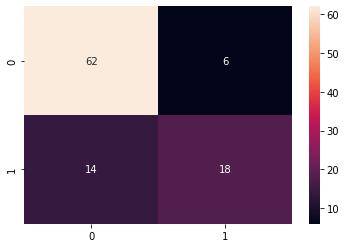

In [61]:
#BERNOULLI
from sklearn.metrics import confusion_matrix

#membandingkan data test dan prediksi
cm = confusion_matrix(y_test,y_pred_bern)

#menampilkan hasil evaluasi menggunakan heatmap
sns.heatmap(cm,annot=True)
plt.savefig('confusion_bern.png')

In [62]:
#menampilkan report dari model bernoulli
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bern))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.75      0.56      0.64        32

    accuracy                           0.80       100
   macro avg       0.78      0.74      0.75       100
weighted avg       0.79      0.80      0.79       100



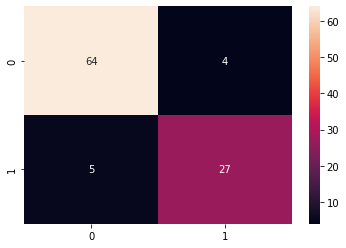

In [63]:
#GAUSSIAN
from sklearn.metrics import confusion_matrix

#membandingkan data test dan prediksi
cm = confusion_matrix(y_test,y_pred_gaus)

#menampilkan hasil evaluasi menggunakan heatmap
sns.heatmap(cm,annot=True)
plt.savefig('confusion_gaus.png')

In [64]:
#menampilkan report dari model bernoulli
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gaus))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



# kesimpulan
setelah melakukan uji pada model bernoulli dan gaussian, dapat kita simpulkan bahwa gaussian merupakan model terbaik untuk memprediksi data yang kita gunakan dengan akurasi sebesar 91% sedangkan bernoulli hanya 80%

## Multinomial

In [65]:
#membaca data dan menyimpannya di variabel data
data = pd.read_csv('D:\CODING\PROJECT\COLLEGE\DATA\spam.csv',encoding = 'latin-1')

In [66]:
data.head() #melihat 5 teratas dari data

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
#mendrop kolom seperti dibawah
data.drop(['Unnamed: 2', 'Unnamed: 3', "Unnamed: 4",], axis = 1,  inplace=True)

In [68]:
#melihat 5 data teratas
data.head

<bound method NDFrame.head of      class                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [69]:
#mengubah ham menjadi 0 dan spam menjadi 1 pada data di kolom class 
data['class'] = data['class'].map({'ham':0, 'spam': 1})

In [70]:
#melihat data
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
#menyimpan data dari kolom message dan class pada variabel x dan y
X=data['message']
y=data['class']

In [73]:
#mengimport library untuk vektorisasi
from sklearn.feature_extraction.text import CountVectorizer
#cv sebagai objek countvectorizer
cv=CountVectorizer()
#melakukan vektorisasi
X=cv.fit_transform(X)

In [74]:
# mengimport library train test split
from sklearn.model_selection import train_test_split
#menentukan training dan test data menggunakan data yang telah kita pilih sebelumnya dengan test data sebesar 20%
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
#mengimport multinomial
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
#training data
model.fit(x_train, y_train)

MultinomialNB()

In [76]:
#melihat akurasi dari multinomial
model.score(x_test, y_test)

0.97847533632287

In [77]:
# Memprediksi data baru
msg="You Won 500$"
#vektorisasi ke array
data = [msg]
vect = cv.transform(data).toarray()
# Memprediksi
my_prediction = model.predict(vect)

In [78]:
# Menampilkan hasil prediksi
print(my_prediction)

[1]


# kesimpulan
model multinomial yang kita gunakan telah berhasil dalam mengklasifikasi pesan yang didapatkan apakah dia itu termasuk spam atau tidak, hal itu telah dibuktikan dengan contoh msg "you won 500$". <br>
dan model ini mempunyai  akurasi yang sangat tinggi, yaitu sebesar 97%